In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
scale = 'data_norm'
#scale = 'data_std'

sm = pd.read_csv('../result/{}/sm.csv'.format(scale), index_col=0)
b1 = pd.read_csv('../result/{}/b1.csv'.format(scale), index_col=0)
b2 = pd.read_csv('../result/{}/b2.csv'.format(scale), index_col=0)
ada = pd.read_csv('../result/{}/ada.csv'.format(scale), index_col=0)
enn = pd.read_csv('../result/{}/enn.csv'.format(scale), index_col=0)
tom = pd.read_csv('../result/{}/tom.csv'.format(scale), index_col=0)
mnd = pd.read_csv('../result/{}/mnd.csv'.format(scale), index_col=0)
col_name = sm.columns

In [3]:
# mean
df = pd.concat([sm.mean(), b1.mean(), b2.mean(),
                ada.mean(), enn.mean(), tom.mean(), mnd.mean()], axis=1).T

svm = df[df.columns[0:6]]
dt = df[df.columns[6:12]]
knn = df[df.columns[12:18]]

dt.columns = svm.columns
knn.columns = svm.columns

df = pd.concat([svm, dt, knn], ignore_index=True, axis=0)
df =df.round(2)

index_name = ['SMOTE', 'Borderline1', 'Borderline2', 'ADASYN', 'SMOTEENN', 'SMOTETomek', 'MNDO']
index_name = index_name * int(len(df.index)/7)
df['Sampling'] = index_name
df = df.set_index([df.index, 'Sampling'])

In [4]:
# save
os.makedirs('../result/summary'.format(scale), exist_ok=True)
df.to_csv('../result/summary/{}.csv'.format(scale))

In [5]:
index_name = ['SMOTE', 'Borderline1', 'Borderline2', 'ADASYN', 'SMOTEENN', 'SMOTETomek', 'MNDO']
svm['Sampling'] = index_name
svm = svm.drop(['Sensitivity', 'Specificity'], axis=1)
svm_melt = pd.melt(svm, id_vars='Sampling', var_name='Metrics', value_name='values')

dt['Sampling'] = index_name
dt = dt.drop(['Sensitivity', 'Specificity'], axis=1)
dt_melt = pd.melt(dt, id_vars='Sampling', var_name='Metrics', value_name='values')

knn['Sampling'] = index_name
knn = knn.drop(['Sensitivity', 'Specificity'], axis=1)
knn_melt = pd.melt(knn, id_vars='Sampling', var_name='Metrics', value_name='values')

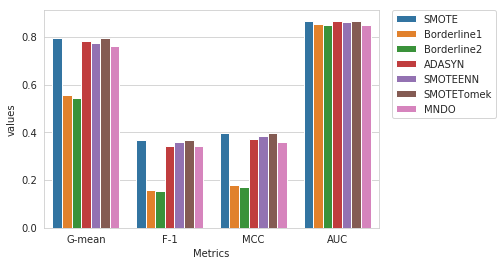

In [6]:
sns.barplot(x='Metrics', y='values', hue='Sampling', data=svm_melt)
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)
plt.savefig('svm_{}.png'.format(scale), dpi=300, bbox_inches='tight')

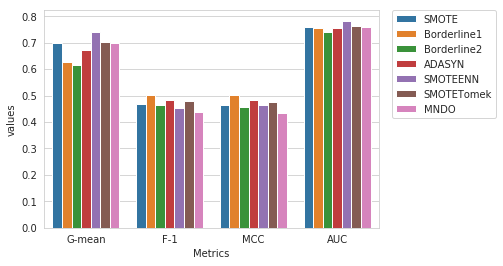

In [7]:
sns.barplot(x='Metrics', y='values', hue='Sampling', data=dt_melt)
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)
plt.savefig('dt_{}.png'.format(scale), dpi=300, bbox_inches='tight')

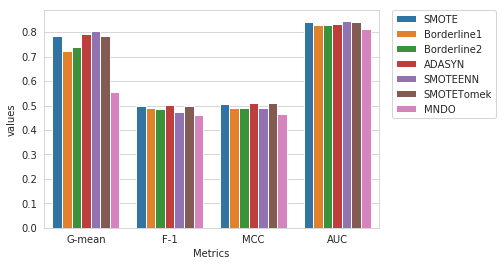

In [8]:
sns.barplot(x='Metrics', y='values', hue='Sampling', data=knn_melt)
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)
plt.savefig('knn_{}.png'.format(scale), dpi=300, bbox_inches='tight')

In [ ]:
# mean + std
"""
sm = pd.concat([sm.mean(), sm.std()], axis=1).T
b1 = pd.concat([b1.mean(), b1.std()], axis=1).T
b2 = pd.concat([b2.mean(), b2.std()], axis=1).T
ada = pd.concat([ada.mean(), ada.std()], axis=1).T
enn = pd.concat([enn.mean(), enn.std()], axis=1).T
tom = pd.concat([tom.mean(), tom.std()], axis=1).T
mnd = pd.concat([mnd.mean(), mnd.std()], axis=1).T

df = pd.concat([sm, b1, b2, ada, enn, tom, mnd])

svm = df[df.columns[0:6]]
dt = df[df.columns[6:12]]
knn = df[df.columns[12:18]]

dt.columns = svm.columns
knn.columns = svm.columns

df = pd.concat([svm, dt, knn], ignore_index=True, axis=0)
df =df.round(2)

statics = ['Mean', 'Std'] * int(len(df.index)/2)
df['Statics'] = statics
df = df.set_index([df.index, 'Statics'])
